In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.9 MB/s eta 0:00:00


In [3]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 56.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 56.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.1-py3-none-any.whl size=25313921 sha256=

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [5]:
data_train = pd.read_csv('/content/drive/MyDrive/waterQuality/wQuality.csv')

In [6]:
data_train['corr'].value_counts()

1    19824
0    18981
Name: corr, dtype: int64

In [7]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses

from tensorflow.keras.metrics import AUC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(data_train['text'],\
                                                      data_train['corr'],\
                                                      test_size=0.3,\
                                                      random_state=0)

In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [10]:
# Building model with transformer
model_name = 'roberta-base'

trans = text.Transformer(model_name, maxlen=128)

In [11]:
len(X_train), len(X_test)

(27163, 11642)

In [12]:
# consider 30k comments
num_words = 30000

# convert texts to number format - for tensorflow.

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(data_train['text'].values.astype(str).tolist())

print(str(tokenizer.texts_to_sequences(['this is a test'])))

[[11, 23077, 23077, 710]]


In [13]:
# text-to-number
x_train = np.array( tokenizer.texts_to_sequences(X_train.values.astype(str)) )
x_test  = np.array( tokenizer.texts_to_sequences(X_test.values.astype(str)) )

<ipython-input-13-52717cdf9361>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array( tokenizer.texts_to_sequences(X_train.values.astype(str)) )
<ipython-input-13-52717cdf9361>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test  = np.array( tokenizer.texts_to_sequences(X_test.values.astype(str)) )


In [14]:
x_train = pad_sequences(x_train, padding='post', maxlen=128)
x_test = pad_sequences(x_test, padding='post', maxlen=128)

In [15]:
X_train = X_train.values.astype(str).tolist()
y_train = y_train.values.astype(str).tolist()

X_test = X_test.values.astype(str).tolist()
y_test = y_test.values.astype(str).tolist()

In [16]:
len(X_train), len(X_test)

(27163, 11642)

In [17]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 21
	95percentile : 40
	99percentile : 44


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 20
	95percentile : 40
	99percentile : 43


In [18]:
# getting roberta-base model.
model = trans.get_classifier()

In [19]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 8)

In [20]:
history = learner.autofit(1e-5, 6)



begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/6
3396/3396 [==============================] - 900s 258ms/step - loss: 0.1757 - accuracy: 0.9172 - val_loss: 0.1112 - val_accuracy: 0.9520
Epoch 2/6
3396/3396 [==============================] - 876s 257ms/step - loss: 0.0989 - accuracy: 0.9556 - val_loss: 0.1070 - val_accuracy: 0.9540
Epoch 3/6
3396/3396 [==============================] - 876s 257ms/step - loss: 0.0837 - accuracy: 0.9626 - val_loss: 0.0991 - val_accuracy: 0.9577
Epoch 4/6
3396/3396 [==============================] - 875s 256ms/step - loss: 0.0683 - accuracy: 0.9710 - val_loss: 0.1144 - val_accuracy: 0.9551
Epoch 5/6
3396/3396 [==============================] - 875s 256ms/step - loss: 0.0527 - accuracy: 0.9793 - val_loss: 0.1384 - val_accuracy: 0.9551
Epoch 6/6
3396/3396 [==============================] - 876s 257ms/step - loss: 0.0404 - accuracy: 0.9844 - val_loss: 0.1443 - val_accuracy: 0.9549


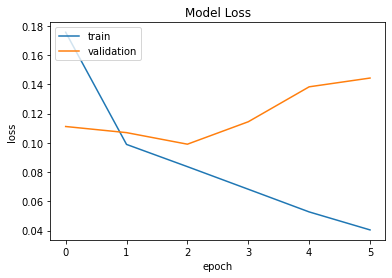

In [21]:
learner.plot('loss')

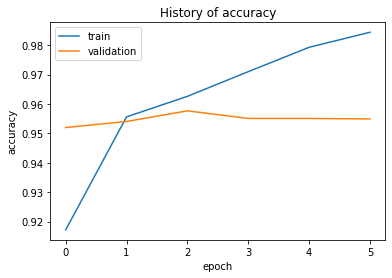

In [22]:
learner.plot('accuracy')

In [23]:
learner.validate()

364/364 [==============================] - 69s 183ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5733
           1       0.96      0.95      0.96      5909

    accuracy                           0.95     11642
   macro avg       0.95      0.95      0.95     11642
weighted avg       0.95      0.95      0.95     11642



array([[5487,  246],
       [ 279, 5630]])

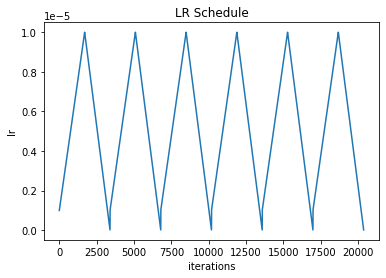

In [24]:
learner.plot('lr')